In [1]:
# Project 1: AI-Powered Task Management System
# Problem Statement:
# Design and develop an intelligent task management system that leverages NLP and ML techniques to
# automatically classify, prioritize, and assign tasks to users based on their behavior, deadlines, and workloads.

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df  = pd.read_csv('dataset/task.csv')
df.columns

Index(['task_id', 'title', 'description', 'priority', 'status', 'assigned_to',
       'deadline', 'created_at', 'category'],
      dtype='object')

In [4]:
df.isnull().sum()
df = df.dropna().reset_index(drop=True)

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['task_completion_days'] = (df['deadline'] - df['created_at']).dt.days


In [6]:
df.isnull().sum()

task_id                 0
title                   0
description             0
priority                0
status                  0
assigned_to             0
deadline                0
created_at              0
category                0
task_completion_days    0
dtype: int64

In [7]:
df.duplicated().sum() 

0

In [8]:
df.describe()

,task_id,deadline,created_at,task_completion_days
count,1476.000000,1476,1476,1476.000000
mean,751.466802,2025-05-14 15:18:02.926829568,2025-04-15 03:22:55.609755904,29.496612
min,1.000000,2025-03-18 00:00:00,2025-03-16 00:00:00,0.000000
25%,377.750000,2025-05-01 00:00:00,2025-03-31 00:00:00,12.000000
50%,752.500000,2025-05-18 00:00:00,2025-04-16 00:00:00,27.000000
75%,1124.250000,2025-05-31 00:00:00,2025-04-30 00:00:00,43.000000
max,1500.000000,2025-06-13 00:00:00,2025-05-14 00:00:00,88.000000
std,432.185333,NaN,NaN,20.050833


In [9]:
df.describe(include='object')

,title,description,priority,status,assigned_to,category
count,1476,1476,1476,1476,1476,1476
unique,13,15,7,5,8,10
top,Fix Login Bug,Update the navigation bar as per the new UI gu...,Medium,Open,Diana,Refactor
freq,181,165,498,533,305,314


In [10]:
df.head()   

,task_id,title,description,priority,status,assigned_to,deadline,created_at,category,task_completion_days
0,1,Update Database Schema,Write unit tests for the newly added features.,Medium,Completed,Charlie,2025-03-25,2025-03-17,Feature,8
1,2,Create Unit Tests,Write unit tests for the newly added features.,High,Open,Eve,2025-05-26,2025-05-06,Documentation,20
2,3,Fix UI Glitches,Update the navigation bar as per the new UI gu...,Low,Completed,Alice,2025-04-23,2025-04-10,Improvement,13
3,4,Create Unit Tests,Fix alignment and spacing issues on the mobile...,Medium,In Progress,Eve,2025-05-05,2025-04-24,Feature,11
4,5,Update Database Schema,Improve the performance of the backend queries.,Medium,Completed,Eve,2025-06-10,2025-04-27,Documentation,44


In [11]:
df['priority'].value_counts()

priority
Medium          498
High            495
Low             479
measure           1
relationship      1
design            1
oil               1
Name: count, dtype: int64

In [12]:
# Keep only specific categories in 'priority'
allowed_priorities = ['High', 'Medium', 'Low']
df = df[df['priority'].isin(allowed_priorities)].reset_index(drop=True)
df['priority'].value_counts()

priority
Medium    498
High      495
Low       479
Name: count, dtype: int64

In [13]:
df['status'].value_counts()


status
Open           532
In Progress    510
Completed      428
meet             1
finish           1
Name: count, dtype: int64

In [14]:
allowed_statuses = ['Completed', 'In Progress', 'Open']
df = df[df['status'].isin(allowed_statuses)].reset_index(drop=True)
df['status'].value_counts()

status
Open           532
In Progress    510
Completed      428
Name: count, dtype: int64

In [15]:
df['category'].value_counts()

category
Refactor         313
Bug              304
Feature          286
Documentation    285
Improvement      279
resource           1
itself             1
former             1
Name: count, dtype: int64

In [16]:
alloed_categories = ['Refactor', 'Bug', 'Feature', 'Documentation',"Improvement"]
df = df[df['category'].isin(alloed_categories)].reset_index(drop=True)
df['category'].value_counts()

category
Refactor         313
Bug              304
Feature          286
Documentation    285
Improvement      279
Name: count, dtype: int64

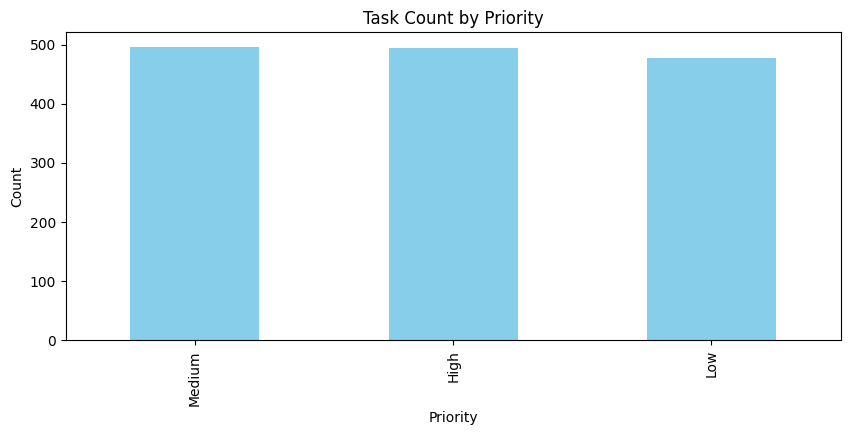

In [17]:
# 4. Univariate Analysis

# Bar charts for categorical features
plt.figure(figsize=(10, 4))
df['priority'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Task Count by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

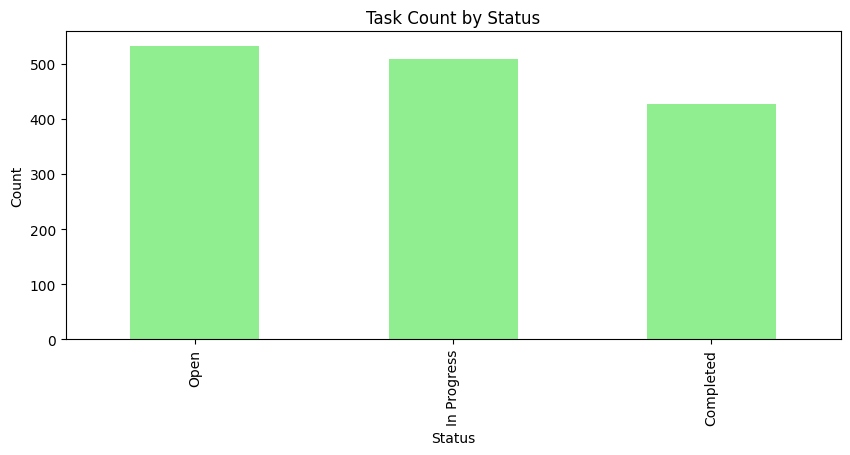

In [18]:
# Pie chart for task status
plt.figure(figsize=(10, 4))
df['status'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Task Count by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


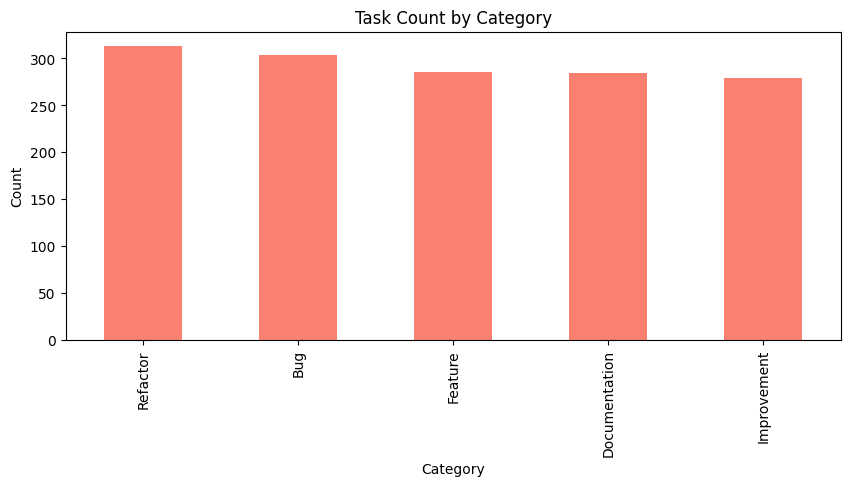

In [19]:
#bar chart for task category
plt.figure(figsize=(10, 4))
df['category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Task Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

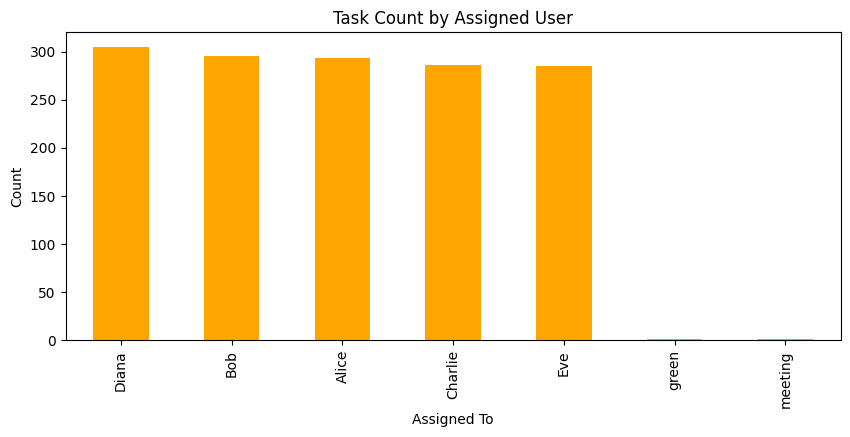

In [20]:
#bar chart for assigned user
plt.figure(figsize=(10, 4))
df['assigned_to'].value_counts().plot(kind='bar', color='orange')
plt.title('Task Count by Assigned User')
plt.xlabel('Assigned To')
plt.ylabel('Count')
plt.show()

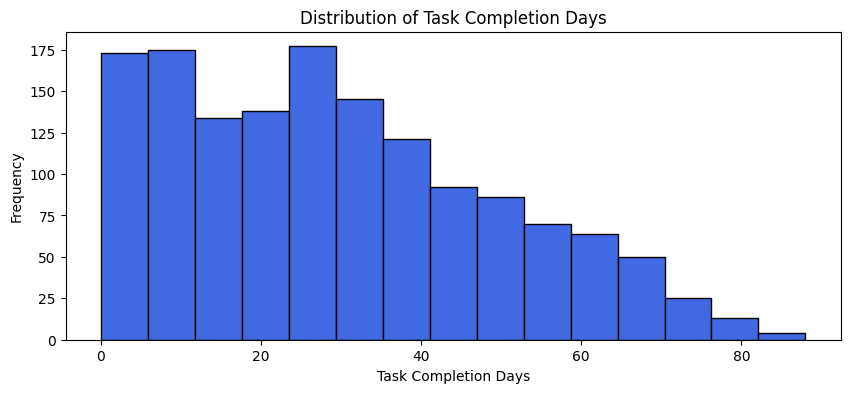

In [21]:
# Histogram for numerical feature
plt.figure(figsize=(10, 4))
plt.hist(df['task_completion_days'], bins=15, color='royalblue', edgecolor='black')
plt.title('Distribution of Task Completion Days')
plt.xlabel('Task Completion Days')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x500 with 0 Axes>

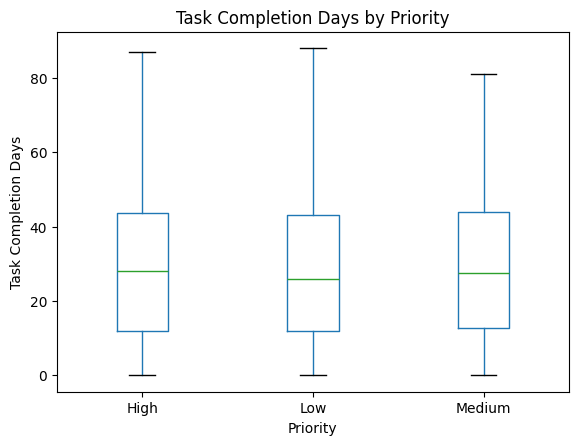

In [22]:
# 5. Bivariate Analysis

# Boxplot: Task completion days by priority
plt.figure(figsize=(8, 5))
df.boxplot(column='task_completion_days', by='priority', grid=False)
plt.title('Task Completion Days by Priority')
plt.suptitle('')
plt.xlabel('Priority')
plt.ylabel('Task Completion Days')
plt.show()

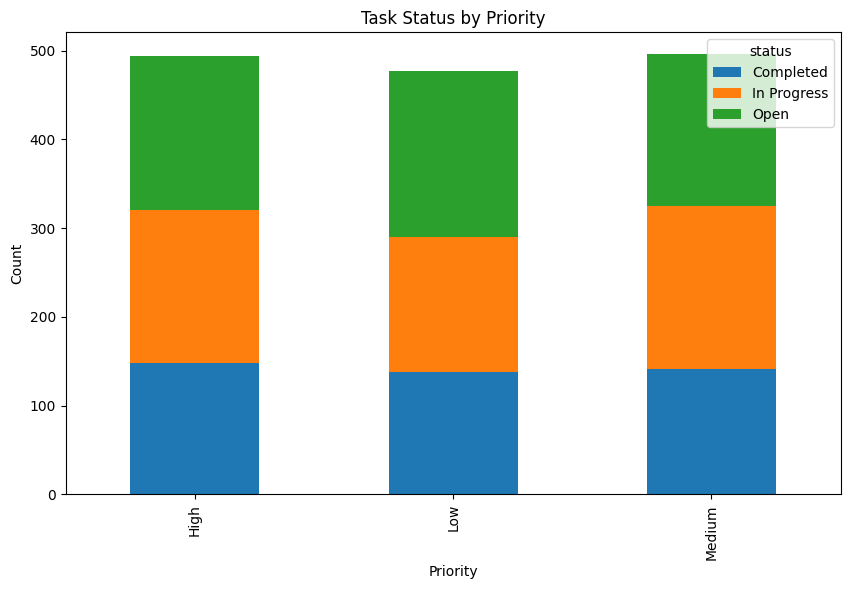

In [23]:

# Stacked bar: Task status by priority
status_priority = pd.crosstab(df['priority'], df['status'])
status_priority.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Task Status by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

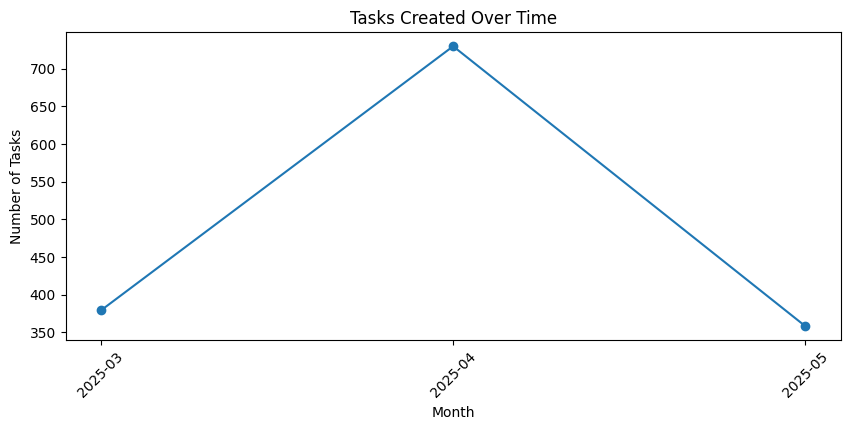

In [24]:
# 6. Time-based Analysis

# Tasks created over time (by month)
df['created_month'] = df['created_at'].dt.to_period('M').astype(str)
created_counts = df['created_month'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
plt.plot(created_counts.index, created_counts.values, marker='o')
plt.title('Tasks Created Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.show()

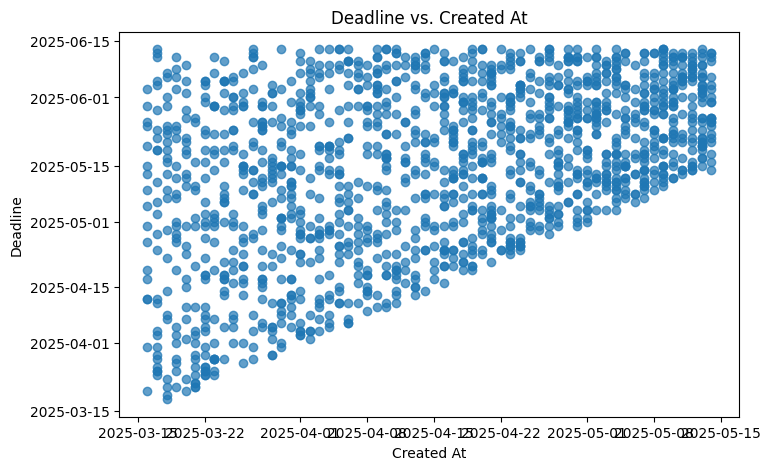

In [25]:

# Deadline vs. created_at scatter
plt.figure(figsize=(8, 5))
plt.scatter(df['created_at'], df['deadline'], alpha=0.7)
plt.title('Deadline vs. Created At')
plt.xlabel('Created At')
plt.ylabel('Deadline')
plt.show()

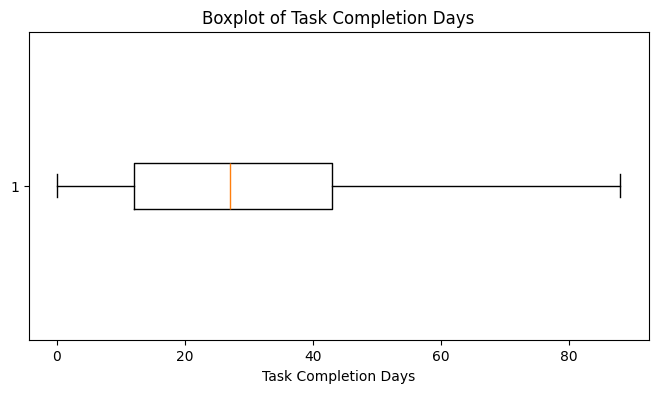

In [26]:
# 8. Outlier Detection

plt.figure(figsize=(8, 4))
plt.boxplot(df['task_completion_days'].dropna(), vert=False)
plt.title('Boxplot of Task Completion Days')
plt.xlabel('Task Completion Days')
plt.show()